In [12]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [13]:
# Load Dataset
data = pd.read_csv("noisy_medical_data.csv")

print(data.head())
print(data.info())

   ID                                            Opinion       Source  \
0   1  Fragility fractures and low bone mass, typical...  Radiologist   
1   2  Bones appear dense, trauma more likely than Os...       Doctor   
2   3  Definite Submandibular Stone, moderate grade, ...  Radiologist   
3   4  Diffuse soft tissue edema, not specific for Su...      Patient   
4   5  Disc protrusion compressing nerve root, consis...  Radiologist   

          DiseaseLabel      Label  
0         Osteoporosis    Correct  
1         Osteoporosis  Incorrect  
2  Submandibular Stone    Correct  
3  Submandibular Stone  Incorrect  
4      Disc Herniation    Correct  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            500 non-null    int64 
 1   Opinion       500 non-null    object
 2   Source        500 non-null    object
 3   DiseaseLabel  500 non-null

In [14]:
# Define Text & Label
X_text = data["Opinion"]
y = data["Label"]

In [15]:
# Converting Text into Numbers
vectorizer = TfidfVectorizer(
    stop_words="english",
    max_features=5000
)
X = vectorizer.fit_transform(X_text)

In [16]:
# Train / Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [17]:
# Creating Naive Bayes Model
model = MultinomialNB()

In [18]:
# Train Model
model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [19]:
# Prediction
y_pred = model.predict(X_test)

In [20]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.84

Classification Report:
               precision    recall  f1-score   support

     Correct       0.76      0.96      0.85        46
   Incorrect       0.95      0.74      0.83        54

    accuracy                           0.84       100
   macro avg       0.86      0.85      0.84       100
weighted avg       0.86      0.84      0.84       100


Confusion Matrix:
 [[44  2]
 [14 40]]


In [21]:
# Manual Prediction Example
sample_text = [
    "Pain and swelling around the jaw with difficulty chewing"
]

sample_vector = vectorizer.transform(sample_text)

print("\nPrediction:", model.predict(sample_vector))
print("Probability:", model.predict_proba(sample_vector))


Prediction: ['Incorrect']
Probability: [[0.18940262 0.81059738]]


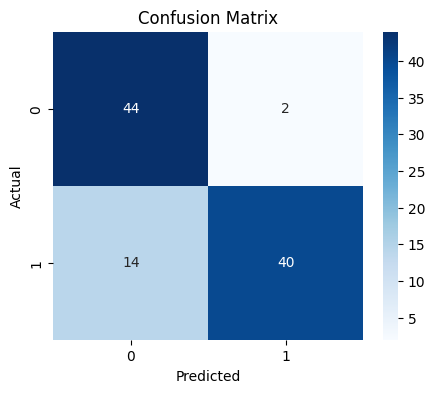

In [23]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()